#Proyek Analisis Data : Bike Sharing Dataset

- **Nama** : Husnul Khatimah
- **Email Dicoding** : husnullkhatimaah@gmail.com
- **Email Akun DBS Coding Camp** : mc223d5x0471@student.devacademy.id
- **ID Dicoding** : husnlkhatmh




#Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
2. Bagaimana siklus perkembangan jumlah penyewaan sepeda selama bulan januari-desember tiap tahunnya?
3. Bagaimana perbandingan jumlah penyewa sepeda tipe casual dan registered berdasarkan tahun?

#Import Semua Packages/Library yang Digunakan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

##Gathering Data

In [26]:
#load tabel
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##Penjelasan Kolom Dataset
  - instant: record index
  - dteday : date
  - season : season (1:springer, 2:summer, 3:fall, 4:winter)
  - yr : year (0: 2011, 1:2012)
  - mnth : month ( 1 to 12)
  - hr : hour (0 to 23)
  - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  - weekday : day of the week
  - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
  - weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
  - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
  - hum: Normalized humidity. The values are divided to 100 (max)
  - windspeed: Normalized wind speed. The values are divided to 67 (max)
  - casual: count of casual users
  - registered: count of registered users
  - cnt: count of total rental bikes including both casual and registered

##Assessing Data

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [28]:
day_df.describe(include= "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [29]:
def check_missvalue(df):
    print("Jumlah duplikat di setiap kolom:")
    for column in df.columns:
        missvalue_count = df[column].isna().sum()
        print(f"{column}: {missvalue_count}")
check_missvalue(day_df)

Jumlah duplikat di setiap kolom:
instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
holiday: 0
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 0
windspeed: 0
casual: 0
registered: 0
cnt: 0


In [30]:
duplikat = day_df.duplicated()
print("jumlah duplikat pada data day_df:", duplikat.sum())

jumlah duplikat pada data day_df: 0


**insight:**
- Terdapat kolom dteday memiliki tipedata object, yang harusnya memiliki tipedata datetime.
- Mengonversi tipe data kolom season, yr, mnth, dan weekday menjadi tipe data string, kemudian mengganti nilainya dengan representasi yang lebih mudah dipahami sesuai penjelasan kolomnya.
- Tidak terdapat Missing Value di setiap kolom
- Tidak ada duplikasi data

#Assesing Data

Mengubah tipedata kolom **dtedate** menjadi datetime

In [31]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Mengubah tipedata kolom **season, yr, mnth, weekday** menjadi string

In [32]:
day_df[['season', 'yr', 'mnth', 'weekday']] = day_df[['season', 'yr', 'mnth', 'weekday']].astype(str)

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah nilai menjadi bentuk yang lebih mudah dipahami.

In [34]:
day_df['season'] = day_df['season'].replace({'1': 'spring', '2': 'summer', '3': 'fall', '4': 'winter'})
day_df['yr'] = day_df['yr'].replace({'0': '2011', '1': '2012'})
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df['weekday'] = day_df['dteday'].dt.day_name()

In [35]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menyimpan data yang sudah dibersihkan kedalam bentuk csv

In [ ]:
day_df.to_csv("penyewaan_sepeda_cleaning.csv")

**Insight** : data sudah di cleaning dengan tipe data pada kolom yang perlu diubah sudah diperbarui, dan nilai-nilainya telah diganti dengan string yang sesuai sebagai representasi.

#Exploratory Data Analysis (EDA)

In [36]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,January,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [38]:
day_df.groupby(by="season").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                                      
            sum   max   min         mean          std
season                                               
fall    1061129  8714  1115  5644.303191  1459.800381
summer   918589  8362   795  4992.331522  1695.977235
winter   841613  8555    22  4728.162921  1699.615261
spring   471348  7836   431  2604.132597  1399.942119

In [39]:
day_df.groupby("mnth")["cnt"].sum().sort_values(ascending=False)

,cnt
mnth,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


In [40]:
day_2012 = day_df[day_df["yr"] == "2012"]
month_cnt_2012 = day_2012.groupby("mnth")["cnt"].sum()
print(month_cnt_2012)

mnth
April        174224
August       214503
December     123713
February     103137
January       96744
July         203607
June         202830
March        164875
May          195865
November     152664
October      198841
September    218573
Name: cnt, dtype: int64


In [41]:
day_df.groupby(by="yr").agg({
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": "sum"
}).sort_values(by=("casual", "sum"), ascending=False)

casual           registered                 cnt
         sum   max min        sum   max  min      sum
yr                                                   
2012  372765  3410   2    1676811  6946   20  2049576
2011  247252  3065   9     995851  4614  416  1243103

In [42]:
corr_value = day_df[["casual", "registered"]].corr()
print(corr_value)

              casual  registered
casual      1.000000    0.395282
registered  0.395282    1.000000


**insight**:
- Musim dingin menunjukkan variasi jumlah penyewaan terbesar.
- Secara keseluruhan, orang lebih banyak menyewa sepeda pada bulan Agustus.
- Jika melihat khusus tahun 2012, puncak penyewaan sepeda terjadi pada bulan September.
- jumlah costumer yang bertipe casual dan
 registered meningkat dari tahun 2011 ke 2012
 dan terdapat hubungan korelasi antara penyewa casual dan registered meskipun tidak begitu banyak.

#Visualization & Explanatory Analysis

##Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

<ipython-input-43-29dfd8542c64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=season_visual["season"],


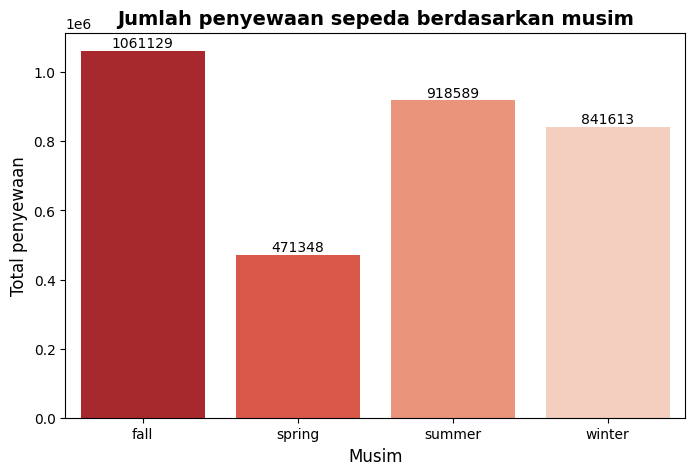

In [43]:
season_visual = day_df.groupby("season")["cnt"].sum().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=season_visual["season"],
                 y=season_visual["cnt"],
                 palette="Reds_r")

for i, value in enumerate(season_visual["cnt"]):
    ax.text(i, value + 500, f"{int(value)}", ha="center", va="bottom", fontsize=10, color="black")

plt.title("Jumlah penyewaan sepeda berdasarkan musim", fontsize=14, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total penyewaan", fontsize=12)
plt.show()


#Pertanyaan 2 : Bagaimana siklus perkembangan jumlah penyewaan sepeda selama bulan januari-desember tiap tahunnya?

<ipython-input-44-647e07ba4b23>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_cnt = day_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()


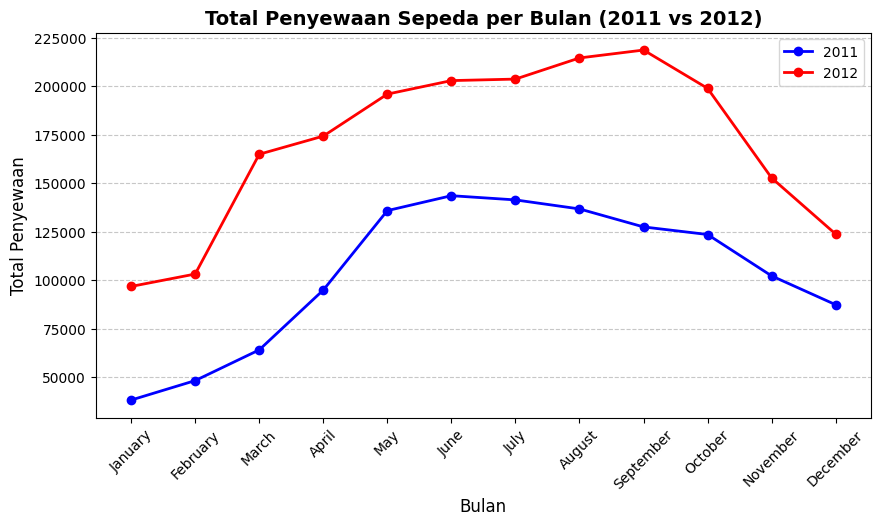

In [44]:
from pandas.api.types import CategoricalDtype

bulan_urut = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

day_df["mnth"] = day_df["mnth"].astype(CategoricalDtype(categories=bulan_urut, ordered=True))

month_cnt = day_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()

month_cnt = month_cnt.reindex(columns=bulan_urut)

plt.figure(figsize=(10, 5))
for year, color in zip(["2011", "2012"], ["blue", "red"]):
    plt.plot(month_cnt.columns, month_cnt.loc[year], marker='o', linestyle='-', color=color, linewidth=2, label=year)

plt.title("Total Penyewaan Sepeda per Bulan (2011 vs 2012)", fontsize=14, fontweight="bold")
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()


#Pertanyaan 3 :Bagaimana perbandingan jumlah penyewa sepeda tipe casual dan registered berdasarkan tahun?

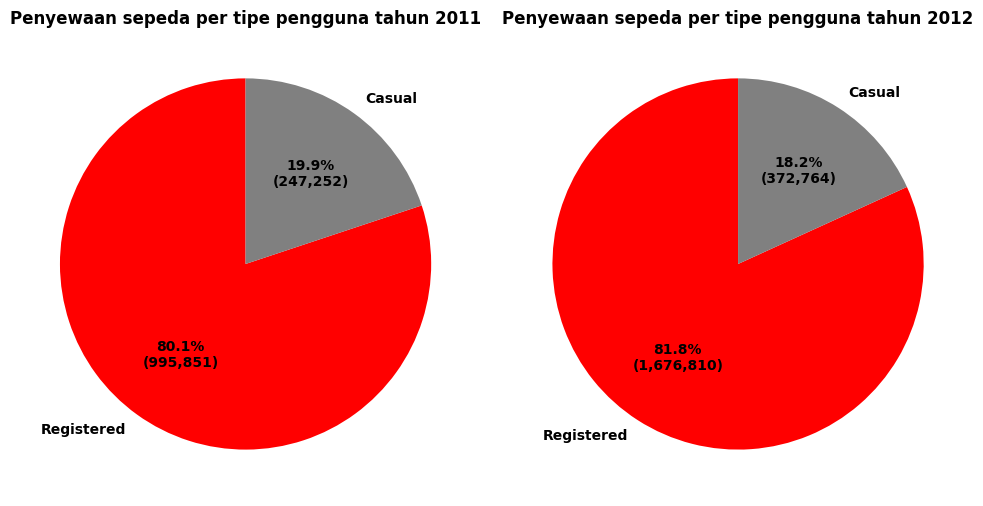

In [45]:
type_customer_yearly = day_df.groupby("yr")[["registered", "casual"]].sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
colors, labels = ["red", "grey"], ["Registered", "Casual"]

for i, year in enumerate(["2011", "2012"]):
    values = type_customer_yearly.loc[year]
    axes[i].pie(values, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct*sum(values)/100):,})",
                colors=colors, startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
    axes[i].set_title(f"Penyewaan sepeda per tipe pengguna tahun {year}", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

**insight :**
- musim gugur menjadi musim dengan penyewaan sepeda terbanyak
- Jumlah penyewaan sepeda di tahun 2012 meningkat signifikan dibandingkan 2011
- Tiap tahun besaran costumer yang bertipe terdaftar jauh lebih banyak dari casual

##Conclusin

- pertanyaan 1 : puncak penyewaan sepeda ialah saat musim gugur/fall dan penyewaan terendah saat musim semi/spring. musim gugur dan panas mungkin merupakan waktu yang dianggap nyaman beraktivitas di luar ruangan khususnya untuk bersepeda. Musim dingin/winter mengalami sedikit penurunan, kemungkinan akibat kondisi cuaca yang lebih ekstrem. Musim semi menjadi yang terendah karna mungkin cuacanya yang tidak men

- Pertanyaan 2 : Dari grafiknya, jumlah penyewaan sepeda tiap tahun memiliki pola yang hampir mirip. Jumlah penyewaan rendah di awal tahun, lalu terus meningkat hingga pertengahan tahun, sebelum akhirnya menurun menjelang akhir tahun. Pada 2011, puncak penyewaan terjadi sekitar Mei-Juni. Sementara itu, di 2012 jumlah penyewaan jauh lebih tinggi dibanding tahun sebelumnya, dengan puncak tertinggi terjadi di September sebelum mengalami penurunan tajam. Kenaikan signifikan dari 2011 ke 2012 mencerminkan semakin populernya bersepeda.

- pertanyaan 3 : penyewa sepeda yang terdaftar jauh lebih banyak dibandingkan penyewa biasa/kasual. Di 2011, sekitar 80,1% penyewaan dilakukan oleh pengguna terdaftar, sementara pengguna biasa hanya sekitar 19,9%. Pada tahub 2012 jumlah penyewa terdaftar sedikit meningkat menjadi 81,8%%, sedangkan penyewa biasa justru berkurang. Meskipun total penyewaan naik di 2012, proporsi penyewa kasual malah menurun, yang menunjukkan bahwa semakin banyak orang memilih untuk mendaftar sebagai pengguna tetap.